# Assignment 2
## Adley Kim

# Abstract

This study examines differences in the change in ridership levels of male and female Citibike customers between the colder month of January and the warmer month of July. The proportion of female riders in January was found to be 4% lower than in July at a statistically significant level. These findings show that the decrease in ridership among female Citibike riders in the colder month of January is more pronounced than among male riders, however the limitations and potential consequences of these findings are discussed in the conclusion.

# Introduction

Citibike is a privately-owned shared bicycle company operating in New York City and Jersey City. First launching in 2013, Citibike serves its customers through a total of 332 stations and 6000 bicycles. As of 2017, Citibike boasted 130,000 annual subscribers with a collective 50 million rides since its launch. Thanks to data made publicly-available on its website, Citibike provides data scientists with rich information that enables them to explore the behavior of urban cyclists and unlock findings that can make cities more conducive to an activity that is healthy for both its citizens and the environment.

This study examines how ridership differs for male and female riders in colder months and warmer months.

# Research Questions:
### Does temperature change alter riding behavior of Citibike customers?
### Do these effects differ between men and women?

# Hypotheses

### Null Hypothesis: The proportion of female riders in January is not significantly different from the proportion of female riders in July.

## $H_{0}: \frac{Jan_{F}}{Jan_{Total}} - \frac{Jul_{F}}{Jul_{Total}} = 0$

### Alternative Hypothesis: The proportion of female riders in January is significantly different from the proportion of female riders in July.

## $H_{1}: \frac{Jan_{F}}{Jan_{Total}} - \frac{Jul_{F}}{Jul_{Total}} \neq 0$

$\alpha$ = 0.05

# Data

Ridership data for the months of July 2013 and January 2014 were downloaded from the [Citibike website](https://www.citibikenyc.com/system-data).

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [215]:
!curl -O https://s3.amazonaws.com/tripdata/201307-citibike-tripdata.zip
!curl -O https://s3.amazonaws.com/tripdata/201401-citibike-tripdata.zip
!mv 201307-citibike-tripdata.zip $PUIDATA
!mv 201401-citibike-tripdata.zip $PUIDATA
!unzip $PUIDATA/201307-citibike-tripdata.zip
!unzip $PUIDATA/201401-citibike-tripdata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.8M  100 25.8M    0     0  44.2M      0 --:--:-- --:--:-- --:--:-- 44.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9470k  100 9470k    0     0  26.7M      0 --:--:-- --:--:-- --:--:-- 26.7M
Archive:  /nfshome/ak3940/PUIdata/201307-citibike-tripdata.zip
  inflating: 2013-07 - Citi Bike trip data.csv  
Archive:  /nfshome/ak3940/PUIdata/201401-citibike-tripdata.zip
  inflating: 2014-01 - Citi Bike trip data.csv  


In [220]:
jul = pd.read_csv('~/PUIdata/2013-07 - Citi Bike trip data.csv')
jan = pd.read_csv('~/PUIdata/2014-01 - Citi Bike trip data.csv')

data = jul.append(jan)
data = data[data['gender'] > 0]
data['gender'] = data['gender'].replace({1 : 'Male', 2 : 'Female'})
data['starttime'] = pd.to_datetime(data['starttime'])
data['month'] = data['starttime'].dt.month
data['month'] = data['month'].replace({7 : 'July', 1 : 'January'})
data['date'] = data['starttime'].dt.date

data = data.groupby(['month', 'date', 'gender']).count()
data = pd.DataFrame(data =data['tripduration'])
data = data.rename(columns = {'tripduration' : 'trips'})
data = data.reset_index(level=['gender', 'month', 'date'])
data = data.sort_values(by=['date'])
data = data.reset_index()
data = data.drop(['index'], axis = 1)

data.head()

,month,date,gender,trips
0,July,2013-07-01,Male,11095
1,July,2013-07-01,Female,2821
2,July,2013-07-02,Female,4029
3,July,2013-07-02,Male,14645
4,July,2013-07-03,Male,13967


In [84]:
tripW = data[data['gender'] == 'Female']
tripW = tripW.rename(columns = {'trips' : 'trips_female'})
tripW = tripW.drop('gender', axis=1)
tripM = data[data['gender'] == 'Male']
tripM = tripM.rename(columns = {'trips' : 'trips_male'})
tripM = tripM.drop('gender', axis=1)

trips = tripW.merge(tripM)
trips['trips_total'] = trips['trips_female'] + trips['trips_male']
trips.head()

,month,date,trips_female,trips_male,trips_total
0,July,2013-07-01,2821,11095,13916
1,July,2013-07-02,4029,14645,18674
2,July,2013-07-03,3746,13967,17713
3,July,2013-07-04,3135,8419,11554
4,July,2013-07-05,3234,10431,13665


In [127]:
trips['date'] = pd.to_datetime(trips['date'])
trips['day'] = trips['date'].dt.day
trips.head()

,month,date,trips_female,trips_male,trips_total,day
0,July,2013-07-01,2821,11095,13916,1
1,July,2013-07-02,4029,14645,18674,2
2,July,2013-07-03,3746,13967,17713,3
3,July,2013-07-04,3135,8419,11554,4
4,July,2013-07-05,3234,10431,13665,5


# Methodology

This study uses two tests to measure the difference in sample proportions for female and male ridership in the months of January and July: the **chi-squared test of proporations** and a two-sided **z-test of proportions**.

### Chi-Squared Test of Proportions

In [216]:
janF = trips['trips_female'][trips['month'] == 'January'].sum() #all female trips in January
janM = trips['trips_male'][trips['month'] == 'January'].sum() #all male trips in January
janT = trips['trips_total'][trips['month'] == 'January'].sum() #total trips in January

julF = trips['trips_female'][trips['month'] == 'July'].sum() #all female trips in January
julM = trips['trips_male'][trips['month'] == 'July'].sum() #all male trips in January
julT = trips['trips_total'][trips['month'] == 'July'].sum() #total trips in January

allF = trips['trips_female'].sum() #all female trips
allM = trips['trips_male'].sum() #all male trips
allT = trips['trips_total'].sum() #all trips

#expected frequencies
janFexp = janT * (allF / allT)
janMexp = janT * (allM / allT)
julFexp = julT * (allF / allT)
julMexp = julT * (allM / allT)

tab = pd.DataFrame({'gender': ['female', 'male', 'total'],
                    'july (#)': [julF, julM, julT], 'july (%)': [julF / julT, julM / julT, julT / julT],
                    'january (#)': [janF, janM, janT], 'january (%)': [janF / janT, janM / janT, janT / janT],
                    'total':[allF, allM, allT]})

tab = tab.set_index('gender')

tab

,january (#),january (%),july (#),july (%),total
gender,,,,,
female,57025,0.194538,157006,0.234868,214031
male,236106,0.805462,511479,0.765132,747585
total,293131,1.000000,668485,1.000000,961616


In [228]:
def chiSq(obs, exp):
    chiSq = ((obs - exp) ** 2) / exp
    return chiSq

chi2 = chiSq(janF, janFexp) + chiSq(janM, janMexp) + chiSq(julF, julFexp) + chiSq(julM, julMexp)

print('chi-squared: {}'.format(chi2))
print('df: 1')

chi-squared: 1915.5413202952739
df: 1


The chi-squared value of 1915.54 implies that we can **reject the null hypothesis** that the two proportions are equal.

### Z-Test of Proportions

In [108]:
pFjan = janF / janT
pFjul = julF / julT

phat = (pFjan * janT + pFjul * julT) / (janT + julT)
sigma = np.sqrt((phat * (1 - phat) / janT) + (phat * (1 - phat) / julT))

z = abs((pFjan - pFjul) / sigma)
print('z-score: {}'.format(z))

z-score: 43.76689754021037


The z-score of $43.77$ far exceeds $z* = 1.96$, meaning that we can *reject the null hypothesis* at the 95% confidence level.

# Conclusion

In [219]:
print('Change in Female Ridership Proportion: {}'.format(janF / janT - julF / julT))
print('Change in Male Ridership Proportion: {}'.format(janM / janT - julM / julT))

Change in Female Ridership Proportion: -0.040330800629752
Change in Male Ridership Proportion: 0.04033080062975203


Although overall Citibike ridership for both genders was considerably lower in January than July, **the proportion of female riders dropped by 4%**. This difference was statistically significant at the confidence level $\alpha = 0.05$, meaning we can **reject the null hypothesis** that ridership for both genders dropped at equally proportional levels.

Despite these statistically significant findings, the extent to which we can claim that these effects are due to temperature change or inclement weather is limited. In this study, month was used as a proxy for temperature and weather based on an understanding that the weather in January is far less suitable for biking than it is in July. However, there are a considerable number of extraneous variables which could influence this discrepency, such as the number of holidays in January versus July.

In the way that it is presented now, this study risks reinforcing unfounded gender stereotypes that women are weaker (or in this case, more susceptible to cold weather) than men -- a sentiment that the author *explicitly disagrees with*.

An opportunity to improve this research through future studies would be to collect daily weather and temperature data and extend the sample to all available data published by Citibike. This would allow for a more accurate illustration to be drawn about how ridership levels between male and female Citibike customers vary according to climate conditions.

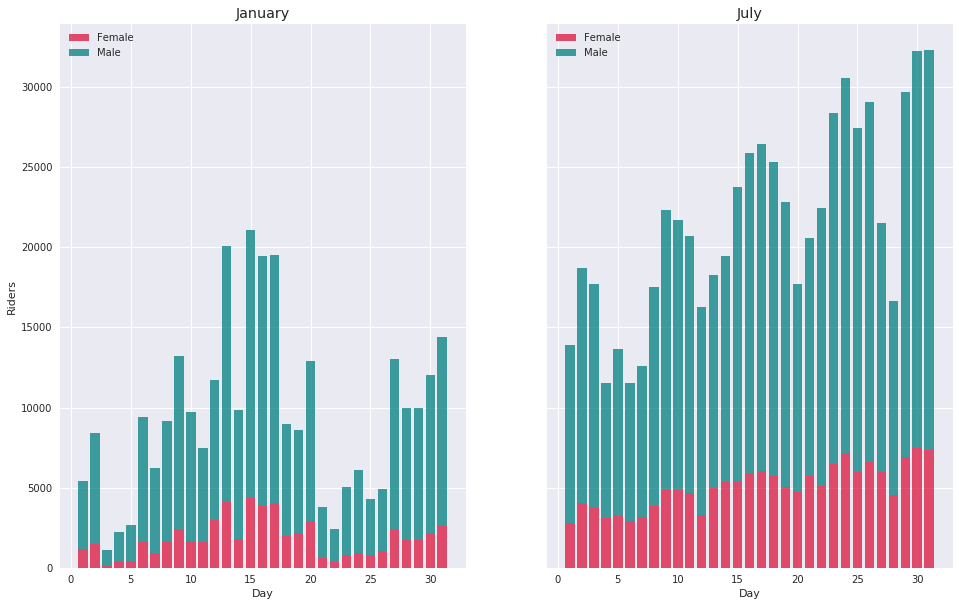

In [227]:
tripsJan = trips[trips['month'] == 'January']
tripsJul = trips[trips['month'] == 'July']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,10), sharex = True, sharey = True)

ax1.bar(x = 'day', height = 'trips_female', color = 'crimson', alpha = 0.75, data = tripsJan)
ax1.bar(x = 'day', height = 'trips_male', bottom = 'trips_female', color = 'teal', alpha = 0.75, data = tripsJan)
ax1.set_title('January', size = 'x-large')
ax2.bar(x = 'day', height = 'trips_female', color = 'crimson', alpha = 0.75, data = tripsJul)
ax2.bar(x = 'day', height = 'trips_male', bottom = 'trips_female', color = 'teal', alpha = 0.75, data = tripsJul)
ax2.set_title('July', size = 'x-large')

ax1.legend(['Female', 'Male'], loc=2)
ax2.legend(['Female', 'Male'], loc=2)

ax1.set_xlabel('Day')
ax2.set_xlabel('Day')
ax1.set_ylabel('Riders')

plt.show()

# Figure 1: Daily Ridership Levels by Month, Gender

Ridership levels for male and female Citibike customers are shown for January and July. Although the difference in overall ridership is immediately apparent, the difference in gender proportions is less clear.

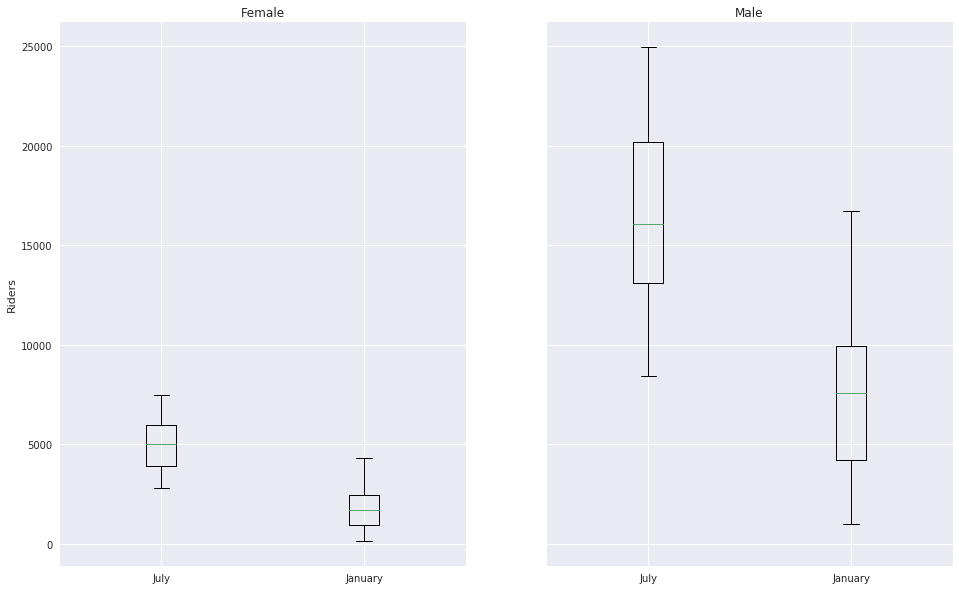

In [233]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,10), sharey = True)

ax1.boxplot([tripsJul.trips_female, tripsJan.trips_female])
ax2.boxplot([tripsJul.trips_male, tripsJan.trips_male])

ax1.set_title('Female')
ax1.set_xticklabels(['July', 'January'])
ax2.set_title('Male')
ax2.set_xticklabels(['July', 'January'])
ax1.set_ylabel('Riders')

plt.show()

# Figure 2: Change in Ridership by Gender, Month

Although male ridership levels appear to drop by a much larger number, the *proportional* drop in female ridership is greater.